<a href="https://colab.research.google.com/github/kabeerbora/cs_ls/blob/main/state_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Necessary Shape Files

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!pip install geopandas==0.14.4
import geopandas as gpd
import matplotlib.pyplot as plt

# Download the shapefile and associated files directly
!wget -q -O India_State_Boundary.shp https://github.com/AnujTiwari/India-State-and-Country-Shapefile-Updated-Jan-2020/raw/master/India_State_Boundary.shp
!wget -q -O India_State_Boundary.shx https://github.com/AnujTiwari/India-State-and-Country-Shapefile-Updated-Jan-2020/raw/master/India_State_Boundary.shx
!wget -q -O India_State_Boundary.dbf https://github.com/AnujTiwari/India-State-and-Country-Shapefile-Updated-Jan-2020/raw/master/India_State_Boundary.dbf

# Load the shapefile
india = gpd.read_file("India_State_Boundary.shp")

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


## Create variables

In [2]:
df_total = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', sheet_name = 'states_added')
df_total['year'] = df_total['year'].astype(str).str.split('-').str[0].astype(int)
df_total['labor_share'] = df_total['Wages and Salaries - Workers'] / df_total['Net Value Added']
df_total['contract_share'] = df_total['Number of Workers - Employed Through Contractors'] / df_total['Number of Workers']
df_total['divergence'] = df_total['Wages and Salaries - Workers']/df_total['Net Value Added']
df_total

,state,year,CPI,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,...,Total Emoluments,Total Input,Total Persons Engaged,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital,labor_share,contract_share,divergence
0,AP,1980,NaN,21105,22593,364249,68286,139324,35377,549194,...,67394,497516,1412562,0,0,41362,106526,0.354333,0.000000,0.354333
1,AP,1981,NaN,29363,26141,387359,62498,165106,38406,584414,...,68872,531725,1482206,0,0,45293,127426,0.325945,0.000000,0.325945
2,AP,1982,NaN,31859,26741,471400,87958,229910,45984,714512,...,100822,719566,1558258,0,0,57213,139390,0.281604,0.000000,0.281604
3,AP,1983,NaN,41230,46111,577466,143811,306497,57538,872091,...,108593,830708,1484798,0,0,67779,194937,0.260304,0.000000,0.260304
4,AP,1984,NaN,16574,51483,631742,122082,337955,63820,960215,...,130354,913922,1401250,0,0,77144,194297,0.269292,0.000000,0.269292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,West Bengal,2017,1318.777,1134797,1610667,23486581,2686207,9041415,1454823,33847430,...,3058688,54783516,1327506,942330,2930117,1563199,4567139,0.210369,0.312708,0.210369
693,West Bengal,2018,1351.042,826498,1836956,24836538,2152931,10199599,1438902,35783860,...,3343313,62867084,1403388,957154,3197107,1761008,340515,0.210581,0.371883,0.210581
694,West Bengal,2019,1423.666,690339,1985218,26601777,2486798,9431085,1485347,39457858,...,3592008,62075283,1472335,1032813,3444020,1867075,188562,0.250753,0.362394,0.250753
695,West Bengal,2020,1395.287,750431,1937830,25055088,1743464,11218589,1221460,37599897,...,3473511,58771100,1350812,1056032,3350206,1772501,9364040,0.190987,0.355751,0.190987


In [3]:
for state, group in df_total.groupby('state'):
    # Filter out rows with 0 or NA in labor_share, contract_share, and divergence
    filtered_group = group[group['labor_share'].notna() & (group['labor_share'] != 0) &
                           group['contract_share'].notna() & (group['contract_share'] != 0) &
                          group['divergence'].notna() & (group['divergence'] != 0)]  # Added divergence filter

    # Calculate percentage change on the filtered group
    filtered_group['delta_ls_pct'] = filtered_group['labor_share'].pct_change() * 100
    filtered_group['delta_cs_pct'] = filtered_group['contract_share'].pct_change() * 100
    filtered_group['delta_div_pct'] = filtered_group['divergence'].pct_change() * 100  # Calculate divergence percentage change
    # df_total.loc[filtered_group.index, ['delta_ls_pct', 'delta_cs_pct']] = filtered_group[['delta_ls_pct', 'delta_cs_pct']]
    # Assign the calculated values back to the original DataFrame
    df_total.loc[filtered_group.index, ['delta_ls_pct', 'delta_cs_pct', 'delta_div_pct']] = filtered_group[['delta_ls_pct', 'delta_cs_pct', 'delta_div_pct']] # Include delta_div_pct


<ipython-input-3-9dbee680c1fa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_group['delta_ls_pct'] = filtered_group['labor_share'].pct_change() * 100
<ipython-input-3-9dbee680c1fa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_group['delta_cs_pct'] = filtered_group['contract_share'].pct_change() * 100
<ipython-input-3-9dbee680c1fa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [5]:
avg_by_ind_code = df_total.groupby('state').agg(lambda x: x[x.notna() & (x != 0)].mean() if x.dtype == float or x.dtype == int else None)
avg_by_ind_code.sample()

,year,CPI,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,Net Fixed Capital Formation,...,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital,labor_share,contract_share,divergence,delta_ls_pct,delta_cs_pct,delta_div_pct
state,,,,,,,,,,,,,,,,,,,,,
Maharashtra,2000.756098,982.013471,1.475496e+06,2.567119e+06,2.915821e+07,4.498682e+06,19107898.0,2.127677e+06,4.419492e+07,1.931562e+06,...,3.015972e+06,7.733740e+06,2.117478e+06,1.090590e+07,0.176011,0.357749,0.176011,0.166526,5.367788,0.166526


## Mapping states to our shape file

In [4]:
state_mapping = {
    'Telengana': 'AP',
    'Andhra Pradesh': 'AP',
    'Chhattishgarh': 'MP',
    'Madhya Pradesh': 'MP',
    'Jharkhand': 'BR',
    'Bihar': 'BR',
    'Uttarakhand': 'UP',
    'Uttar Pradesh': 'UP',
    'Tamilnadu': 'Tamil Nadu',
     'Odisha': 'Orissa',
}
india['State_Name'] = india['State_Name'].replace(state_mapping)
india = india.dissolve(by='State_Name', aggfunc='first')
india = india.reset_index()

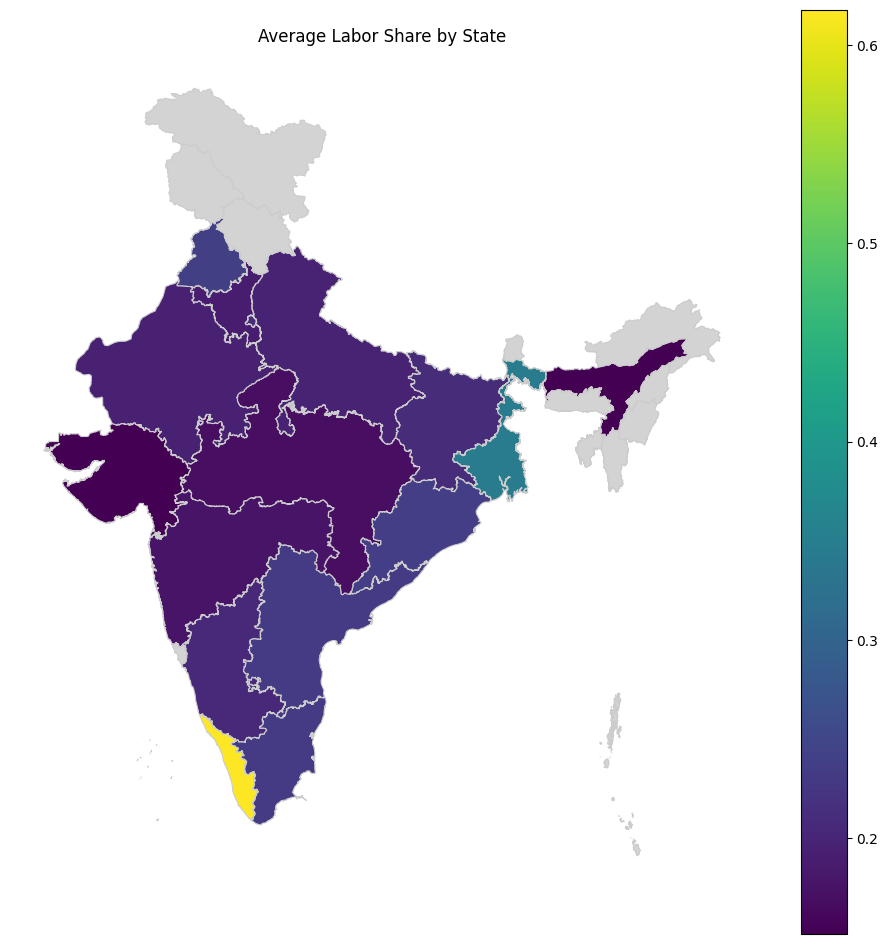

In [6]:
import matplotlib.pyplot as plt
merged_data = india.merge(avg_by_ind_code, left_on='State_Name', right_on='state', how='left')


variable_to_map = 'labor_share'

fig, ax = plt.subplots(1, figsize=(12, 12))
merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'})
ax.set_title('Average Labor Share by State')
ax.axis('off')
plt.show()

# Mapping 1998 \& 2022 CS/LS

In [13]:
df_1998 = df_total[df_total['year'] == 1998]
df_2021 = df_total[df_total['year'] == 2021]
df_1998

,state,year,CPI,Additions to Total Stock,Depreciation,Fixed Capital,Gross Fixed Capital Formation,Gross Value Added,Interest Paid,Invested Capital,...,Wages and Salaries - Supervisory and Managerial Staff,Wages and Salaries - Total,Wages and Salaries - Workers,Working Capital,labor_share,contract_share,divergence,delta_ls_pct,delta_cs_pct,delta_div_pct
17,AP,1998,399.0972,-24615,383199,5161008,563512,1982810,589686,7116338,...,130154,549239,353665,854358,0.221094,0.147760,0.221094,NaN,NaN,NaN
58,Assam,1998,378.0167,1995,39473,453434,45622,344350,27940,654526,...,9351,59933,41596,175469,0.136435,0.075932,0.136435,NaN,NaN,NaN
99,BR,1998,379.2500,-108236,187946,4285655,846928,1925614,295180,5838708,...,79398,377877,248731,1220495,0.143141,0.188308,0.143141,NaN,NaN,NaN
140,Delhi,1998,447.1667,19584,53397,376334,99239,517830,58906,793667,...,33238,121449,60952,577181,0.131240,0.023209,0.131240,NaN,NaN,NaN
181,"Goa, Daman & Diu",1998,451.3333,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
222,Gujarat,1998,403.7833,73230,923459,13895312,2437427,4702740,1209981,17523855,...,226221,770270,417424,3114672,0.110451,0.249695,0.110451,NaN,NaN,NaN
263,Haryana,1998,402.4167,94140,203473,2224570,524725,1297278,228554,3489964,...,127998,399548,222896,1032717,0.203781,0.282095,0.203781,NaN,NaN,NaN
304,Karnataka,1998,410.3542,77081,404896,7299898,2280946,2266714,500895,9114156,...,172251,584804,313263,1053460,0.168257,0.089296,0.168257,NaN,NaN,NaN
345,Kerala,1998,411.7292,83690,47258,1206320,255521,412133,57726,1915307,...,42409,209584,142045,556984,0.389298,0.044014,0.389298,NaN,NaN,NaN
386,MP,1998,405.6500,-12071,357729,4777436,638368,1884685,453783,6347430,...,151528,459837,242635,1298380,0.158901,0.169370,0.158901,NaN,NaN,NaN


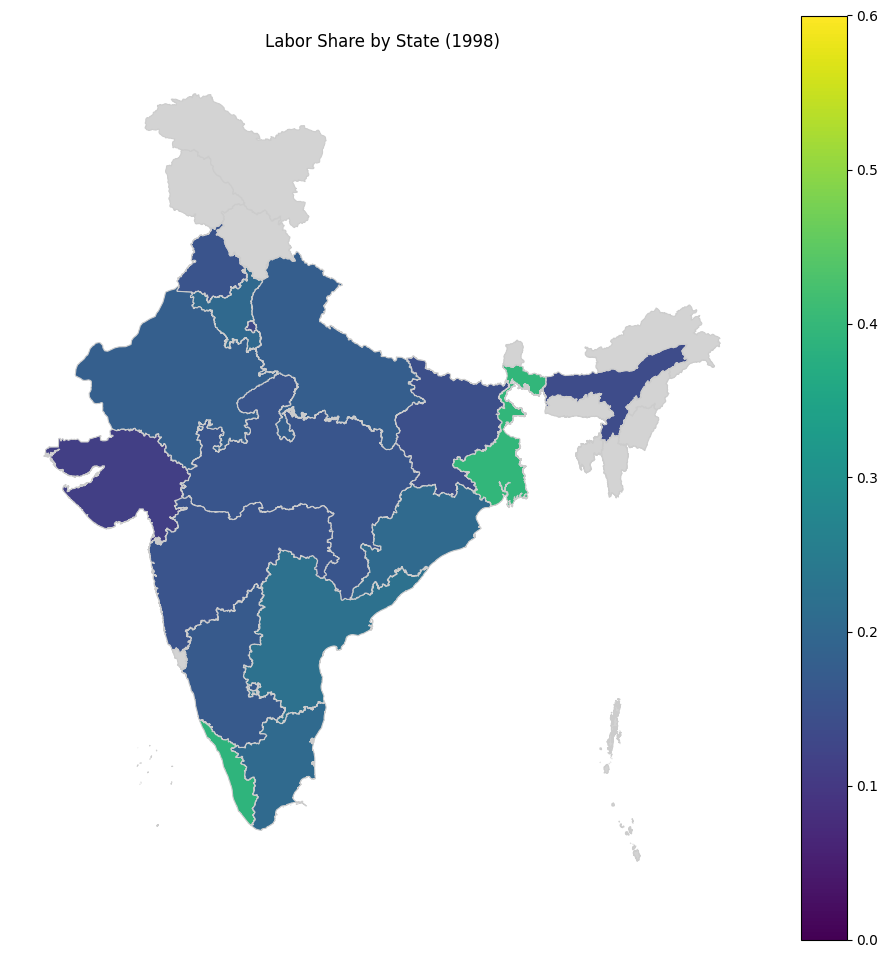

In [18]:
import matplotlib.pyplot as plt
merged_data = india.merge(df_1998, left_on='State_Name', right_on='state', how='left')

variable_to_map = 'labor_share'

fig, ax = plt.subplots(1, figsize=(12, 12))


merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'},
                 vmin=0.0,
                 vmax=0.6)

ax.set_title('Labor Share by State (1998)')
ax.axis('off')
plt.show()

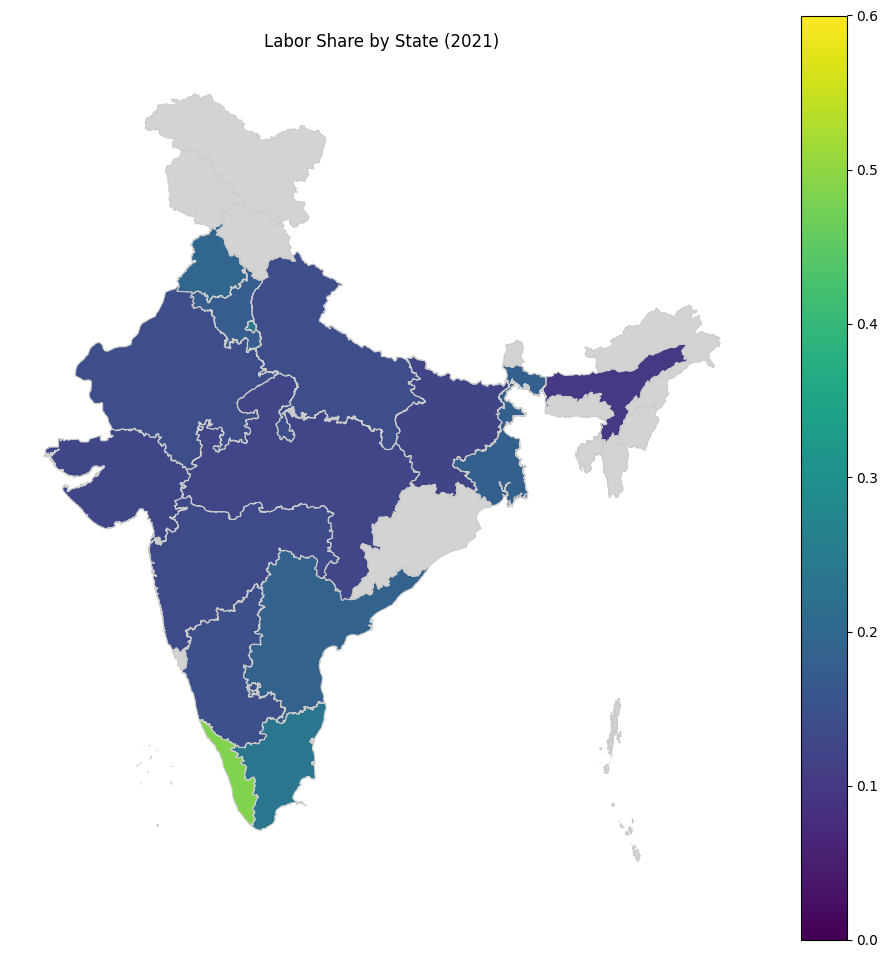

In [20]:
import matplotlib.pyplot as plt
merged_data = india.merge(df_2021, left_on='State_Name', right_on='state', how='left')

variable_to_map = 'labor_share'

fig, ax = plt.subplots(1, figsize=(12, 12))


merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'},
                 vmin=0.0,
                 vmax=0.6)

ax.set_title('Labor Share by State (2021)')
ax.axis('off')
plt.show()

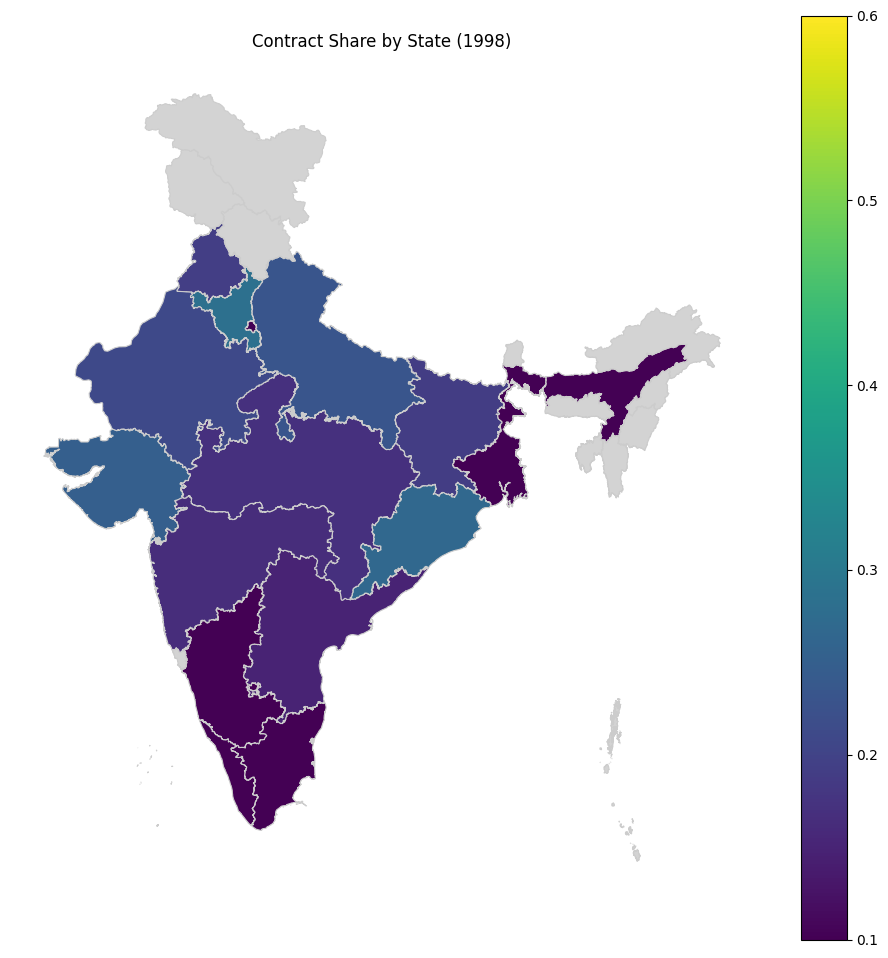

In [25]:
import matplotlib.pyplot as plt
merged_data = india.merge(df_1998, left_on='State_Name', right_on='state', how='left')

variable_to_map = 'contract_share'

fig, ax = plt.subplots(1, figsize=(12, 12))


merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'},
                 vmin=0.1,
                 vmax=0.6)

ax.set_title('Contract Share by State (1998)')
ax.axis('off')
plt.show()

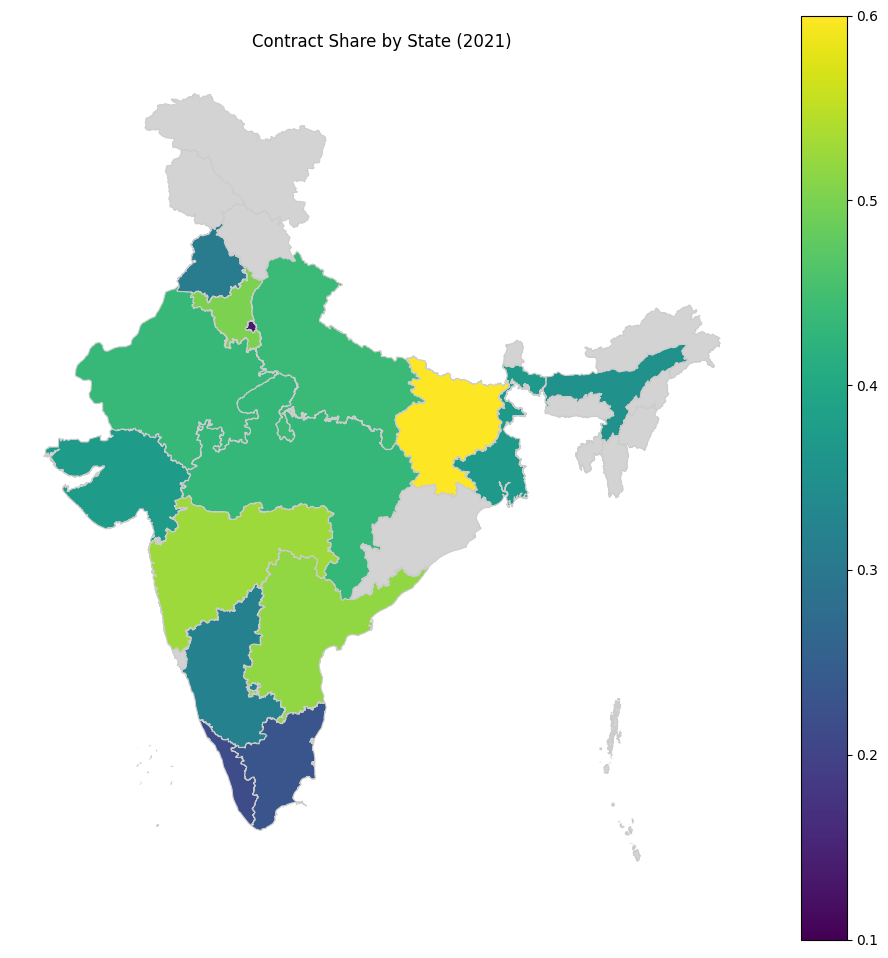

In [27]:
import matplotlib.pyplot as plt
merged_data = india.merge(df_2021, left_on='State_Name', right_on='state', how='left')

variable_to_map = 'contract_share'

fig, ax = plt.subplots(1, figsize=(12, 12))


merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'},
                 vmin=0.1,
                 vmax=0.6)

ax.set_title('Contract Share by State (2021)')
ax.axis('off')
plt.show()

# Creating GIFs

<ipython-input-29-77baac8fac94>:48: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


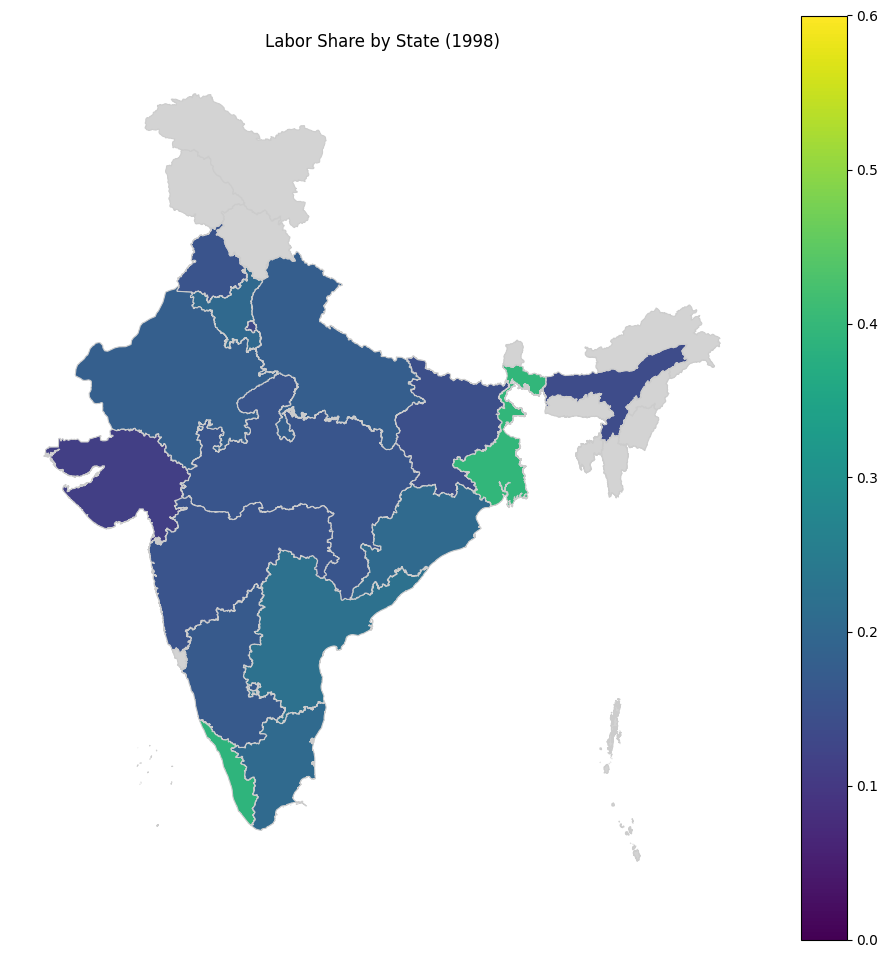

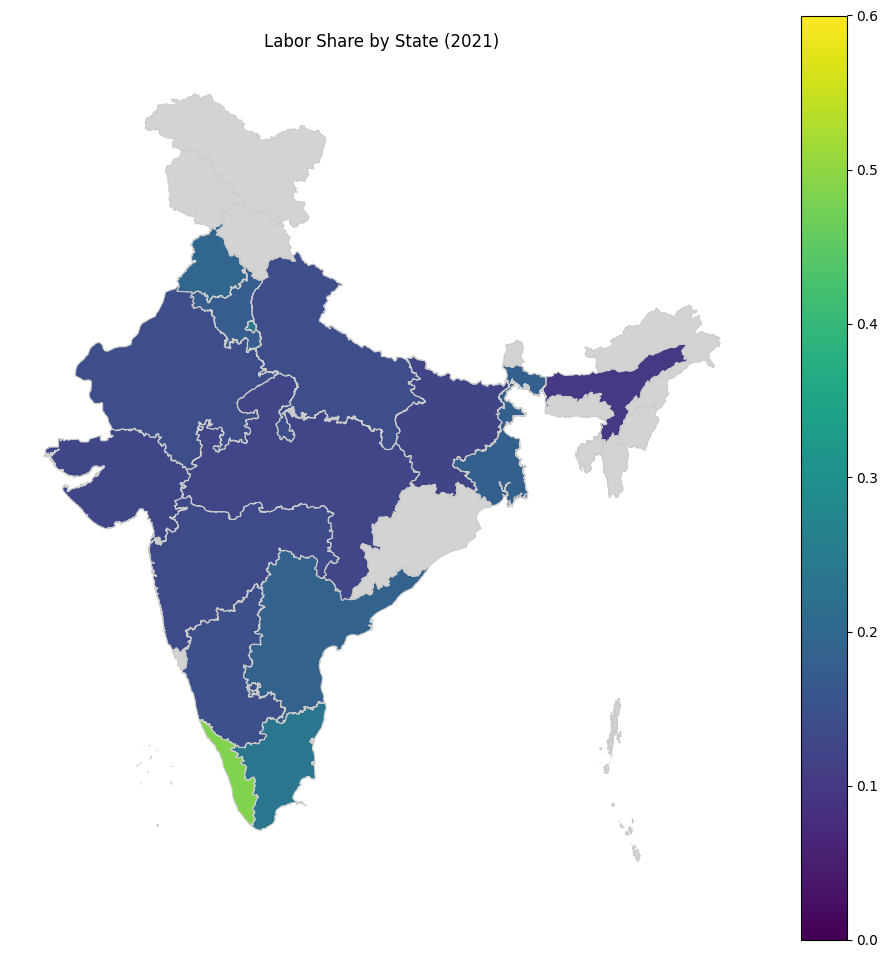

In [29]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

# Generate the first plot (labor_share 1998)
merged_data = india.merge(df_1998, left_on='State_Name', right_on='state', how='left')
variable_to_map = 'labor_share'
fig1, ax1 = plt.subplots(1, figsize=(12, 12))
merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax1,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'},
                 vmin=0.0,
                 vmax=0.6)
ax1.set_title('Labor Share by State (1998)')
ax1.axis('off')

# Generate the second plot (labor_share 2021)
merged_data = india.merge(df_2021, left_on='State_Name', right_on='state', how='left')
variable_to_map = 'labor_share'
fig2, ax2 = plt.subplots(1, figsize=(12, 12))
merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax2,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'},
                 vmin=0.0,
                 vmax=0.6)
ax2.set_title('Labor Share by State (2021)')
ax2.axis('off')

# Save the plots as images
fig1.savefig('plot1.png')
fig2.savefig('plot2.png')

# Create a list of filenames for the GIF
filenames = ['plot1.png', 'plot2.png']
# Create a GIF from the images
images = []
for filename in filenames:
  images.append(imageio.imread(filename))

imageio.mimsave('labor_share_gif.gif', images, fps=1)


# Show the GIF
from IPython.display import Image
imageio.mimsave('labor_share_gif.gif', images, fps=1, loop=0)

<ipython-input-30-5580aafbd8ff>:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


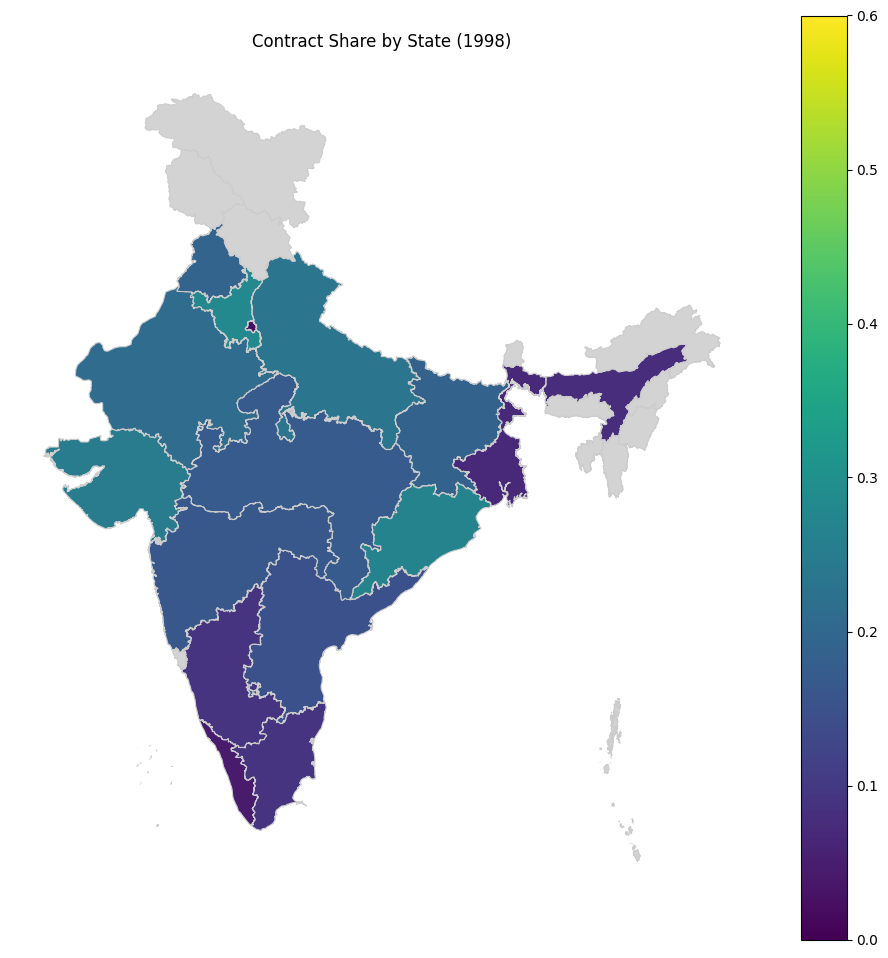

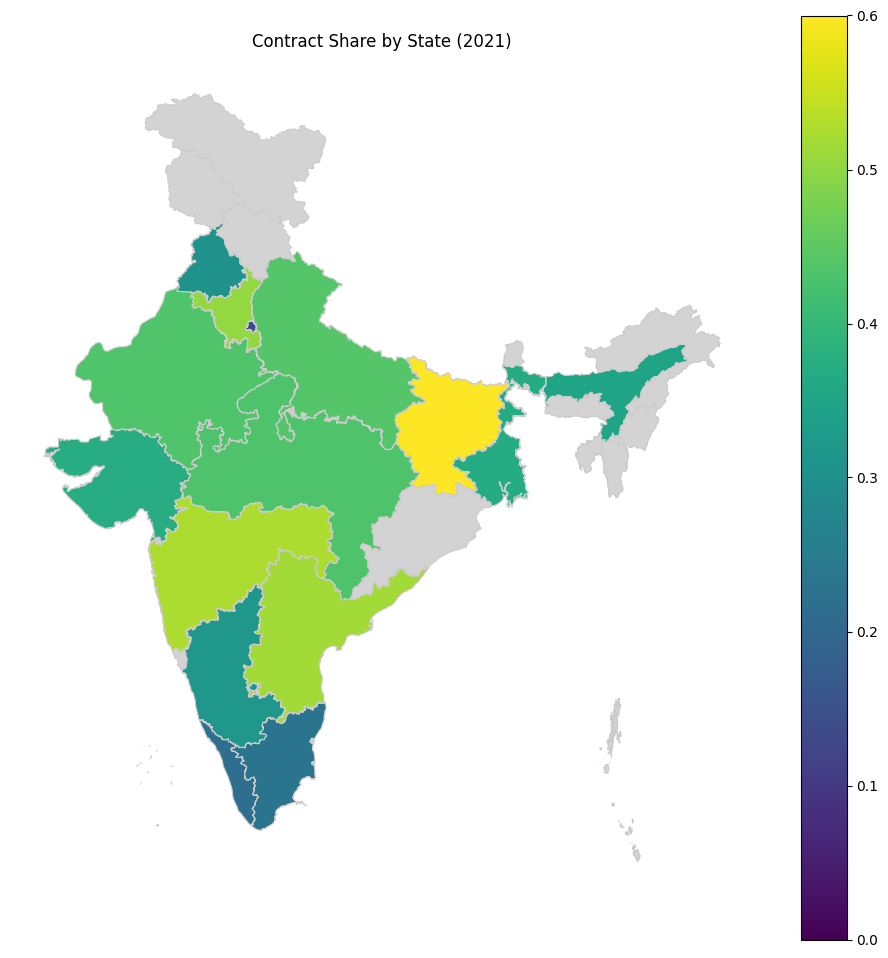

In [30]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

merged_data = india.merge(df_1998, left_on='State_Name', right_on='state', how='left')
variable_to_map = 'contract_share'
fig1, ax1 = plt.subplots(1, figsize=(12, 12))
merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax1,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'},
                 vmin=0.0,
                 vmax=0.6)
ax1.set_title('Contract Share by State (1998)')
ax1.axis('off')

# Generate the second plot (labor_share 2021)
merged_data = india.merge(df_2021, left_on='State_Name', right_on='state', how='left')
variable_to_map = 'contract_share'
fig2, ax2 = plt.subplots(1, figsize=(12, 12))
merged_data.plot(column=variable_to_map,
                 cmap='viridis',
                 linewidth=0.8,
                 ax=ax2,
                 edgecolor='0.8',
                 legend=True,
                 missing_kwds={'color': 'lightgrey'},
                 vmin=0.0,
                 vmax=0.6)
ax2.set_title('Contract Share by State (2021)')
ax2.axis('off')

# Save the plots as images
fig1.savefig('plot1.png')
fig2.savefig('plot2.png')

# Create a list of filenames for the GIF
filenames = ['plot1.png', 'plot2.png']
# Create a GIF from the images
images = []
for filename in filenames:
  images.append(imageio.imread(filename))

imageio.mimsave('cs.gif', images, fps=1)


# Show the GIF
from IPython.display import Image
imageio.mimsave('cs.gif', images, fps=1, loop=0)